In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = "/content/drive/MyDrive/Levine_32dim.fcs.csv"
data = pd.read_csv(file_path)
df = pd.read_csv("/content/drive/MyDrive/Levine_32dim.fcs.csv")


Mounted at /content/drive


In [4]:
df = df.drop(columns=['Time','file_number', 'event_number'])

len(df.columns)


39

In [5]:
import numpy as np
import pandas as pd

def create_corrupted_data(data, keep_probability=0.4):
    print("Original Data (x):\n", data)

    m = np.random.binomial(1, keep_probability, size=data.shape)
    print("\nBinary Mask (m):\n", m)

    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    x_shuffled = data.iloc[shuffled_rows].reset_index(drop=True)
    print("\nShuffled Data (x_shuffled):\n", x_shuffled)


    x_corrupted = data * (1 - m) + x_shuffled * m
    print("\nCorrupted Data (x_corrupted):\n", x_corrupted)

    return x_corrupted

# Sample data
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10],
    'C': [11, 12, 13, 14, 15],
    'D': [16, 17, 18, 19, 20]
})

# Call the function
corrupted_data = create_corrupted_data(data, keep_probability=0.6)


Original Data (x):
    A   B   C   D
0  1   6  11  16
1  2   7  12  17
2  3   8  13  18
3  4   9  14  19
4  5  10  15  20

Binary Mask (m):
 [[1 1 1 0]
 [1 1 1 1]
 [0 1 0 0]
 [0 1 1 1]
 [1 1 1 0]]

Shuffled Data (x_shuffled):
    A   B   C   D
0  3   8  13  18
1  4   9  14  19
2  2   7  12  17
3  1   6  11  16
4  5  10  15  20

Corrupted Data (x_corrupted):
    A   B   C   D
0  3   8  13  16
1  4   9  14  19
2  3   7  13  18
3  4   6  11  16
4  5  10  15  20


In [6]:
corrupted_data = create_corrupted_data(df, keep_probability=0.4)

corrupted_data.head()

Original Data (x):
          Event  Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0            1           22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1            2           35  4.340481  4.816692  0.701349 -0.038280 -0.016654   
2            3           32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3            4           29  4.255806  4.830048  0.433747 -0.027611 -0.017661   
4            5           25  3.976909  4.506433 -0.008809 -0.030297  0.080423   
...        ...          ...       ...       ...       ...       ...       ...   
265622  265623           41  6.826629  7.133022  1.474081 -0.019174 -0.055620   
265623  265624           45  6.787791  7.154026  0.116755 -0.056213 -0.008864   
265624  265625           41  6.889866  7.141219  0.684921 -0.006264 -0.026111   
265625  265626           39  6.865218  7.144353  0.288761 -0.011310 -0.048786   
265626  265627           41  6.887820  7.127359  0.360753  0.128604 -0.006934   

       

,Event,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,CD4,...,CD3,CD61,CD117,CD49d,HLA-DR,CD64,CD41,Viability,label,individual
0,1,20,4.391057,4.917177,0.162691,-0.029585,2.481468,2.561684,-0.009184,0.363602,...,0.047869,-0.002936,0.054787,0.853505,1.664480,-0.005376,0.033906,0.648429,NaN,1
1,128996,37,4.340481,4.142939,0.701349,-0.038280,0.242018,0.074409,0.040751,-0.035424,...,0.319031,1.258437,-0.029837,2.142355,0.491592,0.144814,0.868014,0.561384,NaN,1
2,123925,10,3.838727,4.398589,-0.018258,-0.032216,-0.038419,-0.017137,-0.001881,0.190213,...,0.320792,0.431234,0.046222,2.586670,0.323948,0.185402,0.056702,0.643337,NaN,1
3,4,35,6.916477,7.111680,0.811494,-0.027611,-0.034405,-0.044072,0.733698,-0.019066,...,0.270238,-0.041140,0.066470,0.818002,0.140523,0.003742,-0.026039,0.155905,NaN,2
4,149611,26,3.976909,4.506433,-0.008809,0.623017,0.070794,0.495791,0.244533,-0.027832,...,0.137186,0.168609,0.097013,0.180924,0.048206,0.076167,-0.040488,0.283287,NaN,1


In [7]:
keep_probability=0.4
df_corrupted = np.random.binomial(1, keep_probability, size=df.shape)
print("\nBinary Mask (m):\n", df_corrupted)
mask_new = 1*(df!=df_corrupted)
print("\n New Binary Mask (m):\n",mask_new)


Binary Mask (m):
 [[1 0 0 ... 0 0 0]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 1]
 [0 0 1 ... 1 0 0]]

 New Binary Mask (m):
         Event  Cell_length  DNA1  DNA2  CD45RA  CD133  CD19  CD22  CD11b  CD4  \
0           0            1     1     1       1      1     1     1      1    1   
1           1            1     1     1       1      1     1     1      1    1   
2           1            1     1     1       1      1     1     1      1    1   
3           1            1     1     1       1      1     1     1      1    1   
4           1            1     1     1       1      1     1     1      1    1   
...       ...          ...   ...   ...     ...    ...   ...   ...    ...  ...   
265622      1            1     1     1       1      1     1     1      1    1   
265623      1            1     1     1       1      1     1     1      1    1   
265624      1            1     1     1       1      1     1     1      1    1   
265625      1            1 

In [8]:

df_labeled = df[df['label'].notna()]
df_unlabeled = df[df['label'].isna()]


x_labeled = df_labeled.drop(columns=['label'])
y_labeled = df_labeled['label']

x_unlabeled = df_unlabeled.drop(columns=['label'])
#y_unlabeled = df_unlabeled['label']


print("Labeled Features (x_labeled):\n", x_labeled)
print("\nUnlabeled Features (x_unlabeled):\n", x_unlabeled)
print("\nLabeled Target (y_labeled):\n", y_labeled)

#print("\nUnlabeled Target (y_unlabeled):\n", y_unlabeled)


Labeled Features (x_labeled):
          Event  Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0            1           22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1            2           35  4.340481  4.816692  0.701349 -0.038280 -0.016654   
2            3           32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3            4           29  4.255806  4.830048  0.433747 -0.027611 -0.017661   
4            5           25  3.976909  4.506433 -0.008809 -0.030297  0.080423   
...        ...          ...       ...       ...       ...       ...       ...   
104179  104180           58  6.827981  7.249403 -0.000106 -0.030641  1.432347   
104180  104181           55  6.683204  7.166172  0.692668 -0.037335  1.639063   
104181  104182           40  6.911546  7.152603 -0.036795 -0.014477  1.637975   
104182  104183           48  6.700332  7.100771  0.308817  0.075762  1.455129   
104183  104184           64  6.559460  7.080928  0.519572  0.097257  1.346523 

In [9]:
from sklearn.model_selection import train_test_split

# Split labeled data into training (70%) and testing (30%) sets
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

# Display the results

print("Training Features (x_train):\n", x_train.shape)
print("\nTraining Target (y_train):\n", y_train.shape)
print("\nTesting Features (x_test):\n", x_test.shape)
print("\nTesting Target (y_test):\n", y_test.shape)

print("Training Features (x_train):\n", x_train)
print("\nTraining Target (y_train):\n", y_train)
print("\nTesting Features (x_test):\n", x_test)
print("\nTesting Target (y_test):\n", y_test)



Training Features (x_train):
 (72928, 38)

Training Target (y_train):
 (72928,)

Testing Features (x_test):
 (31256, 38)

Testing Target (y_test):
 (31256,)
Training Features (x_train):
          Event  Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
64113    64114           25  3.899656  4.594272  0.976652  0.302811  0.154761   
82744    82745           31  6.592998  6.901888  0.431481 -0.052898 -0.037690   
24294    24295           41  3.543583  4.467671  0.377192  0.219081  0.245478   
7820      7821           38  4.305227  4.881685  0.199351  0.100678 -0.025812   
43295    43296           26  4.159271  4.861015  0.831285  0.191518  2.002712   
...        ...          ...       ...       ...       ...       ...       ...   
54886    54887           15  4.074604  4.747052  0.431805  0.228761 -0.011434   
76820    76821           33  6.584427  6.882117  0.640424 -0.044057 -0.013737   
103694  103695           43  6.719895  7.080995  0.306443 -0.026339  2.074008   
860

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

def logistic_with_loss(x_train, y_train, x_test, y_test):

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)


    log_reg = LogisticRegression(random_state=42, max_iter=500)
    log_reg.fit(x_train_scaled, y_train)


    probabilities = log_reg.predict_proba(x_test_scaled)


    loss = log_loss(y_test, probabilities)

    return probabilities, loss


log_reg_probs, log_reg_loss = logistic_with_loss(x_train, y_train, x_test, y_test)


print("Logistic Regression Probabilities:\n", log_reg_probs)
print("\nLogistic Regression \n", log_reg_loss)


Logistic Regression Probabilities:
 [[3.62401518e-11 4.63680053e-16 3.01720414e-12 ... 5.47782620e-10
  6.32880969e-09 1.93479875e-08]
 [9.57415988e-15 1.12948711e-13 3.22258619e-14 ... 5.19130523e-10
  2.54479633e-05 3.03046008e-09]
 [1.22516543e-11 3.99984090e-10 7.07802559e-12 ... 2.30970611e-11
  2.41699773e-05 8.03954553e-10]
 ...
 [3.03681398e-10 2.66316774e-05 1.90388788e-08 ... 9.76197149e-09
  2.52284297e-11 9.47905808e-09]
 [1.33802872e-11 1.96825281e-10 1.15281714e-10 ... 1.50675237e-11
  1.51857211e-06 1.48962862e-06]
 [1.85347718e-10 3.76364365e-07 1.94303816e-10 ... 1.16114733e-13
  1.12146699e-05 1.68478163e-10]]

Logistic Regression 
 0.008212995039847832


In [12]:
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import log_loss

def xgboost_with_loss(x_train, y_train, x_test, y_test):

    y_train_adjusted = y_train - 1
    y_test_adjusted = y_test - 1


    xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)
    xgb_clf.fit(x_train, y_train_adjusted)


    probabilities = xgb_clf.predict_proba(x_test)
    loss = log_loss(y_test_adjusted, probabilities)

    return probabilities, loss

xgb_probs, xgb_log_loss = xgboost_with_loss(x_train, y_train, x_test, y_test)

# Displaying the results
print("\nXGBoost Probabilities:\n", xgb_probs)
print("\nXGBoost Log Loss:\n", xgb_log_loss)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00

XGBoost Probabilities:
 [[8.6948893e-07 6.6769360e-07 5.7924643e-07 ... 1.1339170e-06
  8.0592304e-07 9.8761745e-07]
 [8.2698131e-07 6.7274470e-07 5.6591495e-07 ... 1.2137442e-06
  5.6004428e-06 1.4012689e-06]
 [8.7233542e-07 8.3811869e-07 6.6791853e-07 ... 9.0465431e-07
  2.2764661e-06 1.1392165e-06]
 ...
 [5.7695485e-07 1.7840539e-06 4.9159883e-07 ... 6.1490420e-07
  4.5924247e-07 4.8711956e-07]
 [3.9907786e-06 3.3182992e-06 2.7563765e-06 ... 5.0098661e-06
  8.2673432e-06 2.4079944e-05]
 [2.1003004e-06 2.6322352e-06 1.8493437e-06 ... 2.1163657e-06
  3.6414713e-06 2.6413784e-06]]

XGBoost Log Loss:
 0.0014826639086920473


In [13]:
import numpy as np
import pandas as pd

def binary_mask(p_m, x_unlabeled):

    mask = np.random.binomial(1, p_m, size=x_unlabeled.shape)
    return mask

def corruption(mask, x_unlabeled):

    num_rows = x_unlabeled.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    x_shuffled = x_unlabeled.iloc[shuffled_rows].reset_index(drop=True)


    x_corrupted = x_unlabeled * (1 - mask) + x_shuffled * mask
    return x_corrupted


In [14]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np

def self_supervised(x_unlabeled, p_m, alpha, parameters):
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    dimension = x_unlabeled.shape[1]

    input_layer = Input(shape=(dimension,))

    # Hidden layer
    h = Dense(int(dimension), activation='relu')(input_layer)

    # Mask estimation output
    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)

    # Feature estimation output
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    # Define the model
    model = Model(inputs=input_layer, outputs=[output1, output2])

    model.compile(
        optimizer='rmsprop',
        loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': alpha}
    )

    # Ensure data is in the form of NumPy arrays
    x_unlabeled_np = x_unlabeled.to_numpy() if isinstance(x_unlabeled, pd.DataFrame) else x_unlabeled
    corruption_binary_mask = binary_mask(p_m, x_unlabeled_np)
    corrupted_data = corruption(corruption_binary_mask, pd.DataFrame(x_unlabeled_np)).to_numpy()

    # Train the model with correct output names
    model.fit(
        corrupted_data,
        {'mask_estimation': corruption_binary_mask, 'feature_estimation': x_unlabeled_np},
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Extract encoder part of the model
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder, model

# Scale the unlabeled data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)  # Scaled data

# Masking probability, alpha value, and parameters
p_m = 0.5  # Masking probability
alpha = 1.0  # Weight for feature estimation loss

# Parameters for training
parameters = {
    'batch_size': 128,         # Batch size for training
    'epochs': 50               # Number of epochs for training
}

# Run self-supervised training
encoder, model = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)


Epoch 1/50
1262/1262 [==============================] - 3s 2ms/step - loss: 1.5955 - mask_estimation_loss: 0.7021 - feature_estimation_loss: 0.8934
Epoch 2/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5329 - mask_estimation_loss: 0.6949 - feature_estimation_loss: 0.8380
Epoch 3/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5261 - mask_estimation_loss: 0.6941 - feature_estimation_loss: 0.8320
Epoch 4/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5232 - mask_estimation_loss: 0.6939 - feature_estimation_loss: 0.8293
Epoch 5/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5216 - mask_estimation_loss: 0.6938 - feature_estimation_loss: 0.8277
Epoch 6/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5205 - mask_estimation_loss: 0.6938 - feature_estimation_loss: 0.8266
Epoch 7/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5196 - mask_estimation_loss: 0.693

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 38)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 38)                   1482      ['input_1[0][0]']             
                                                                                                  
 mask_estimation (Dense)     (None, 38)                   1482      ['dense[0][0]']               
                                                                                                  
 feature_estimation (Dense)  (None, 38)                   1482      ['dense[0][0]']               
                                                                                              

In [16]:
encoder_path = "/content/encoder_model.keras"
encoder.save(encoder_path)

In [17]:
from keras.models import load_model
encoder = load_model(encoder_path)

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale x_train and x_test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Use the encoder model to transform (encode) the scaled data
x_train_scaled_encoded = encoder.predict(x_train_scaled)
x_test_scaled_encoded = encoder.predict(x_test_scaled)


977/977 [==============================] - 1s 1ms/step


In [19]:
# Logistic Regression on Encoded Data
log_reg_probs, log_reg_loss = logistic_with_loss(x_train_scaled_encoded, y_train, x_test_scaled_encoded, y_test)
print("Logistic Regression Probabilities:\n", log_reg_probs)
print("\nLogistic Regression Log Loss:\n", log_reg_loss)

# XGBoost on Encoded Data
xgb_probs, xgb_log_loss = xgboost_with_loss(x_train_scaled_encoded, y_train, x_test_scaled_encoded, y_test)
print("\nXGBoost Probabilities:\n", xgb_probs)
print("\nXGBoost Log Loss:\n", xgb_log_loss)

Logistic Regression Probabilities:
 [[8.15268645e-11 8.58849093e-13 1.15832421e-11 ... 2.25653714e-10
  3.43909385e-09 8.94272714e-12]
 [1.68726262e-13 2.46675674e-10 1.24569543e-09 ... 2.19933564e-10
  4.93026611e-04 1.83050400e-08]
 [1.42918235e-11 2.57590809e-08 8.75035661e-09 ... 6.93063870e-10
  6.80743967e-06 5.04104467e-08]
 ...
 [1.58939686e-12 1.73157758e-05 3.00470958e-13 ... 7.09780695e-12
  1.78205369e-11 5.15218772e-10]
 [2.56859714e-15 3.65070566e-11 7.42310070e-12 ... 8.52713069e-11
  7.70751959e-06 3.57350897e-06]
 [1.81674240e-10 7.70890873e-08 4.01243615e-09 ... 6.93094997e-09
  2.85345668e-06 2.82721664e-08]]

Logistic Regression Log Loss:
 0.01821868132058444

XGBoost Probabilities:
 [[6.95330925e-07 9.58122882e-07 2.48338310e-08 ... 6.04087802e-08
  1.06392221e-07 3.31497546e-07]
 [4.23522494e-07 7.63562127e-07 2.22956871e-07 ... 8.21504614e-07
  2.41481743e-04 2.99659263e-07]
 [2.49614175e-07 1.24963344e-06 3.27355878e-07 ... 7.47018248e-07
  1.75810931e-06 2.6947

In [20]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout,Activation
from tensorflow.keras.models import Model
def model(input_dimension , hidden_dimension , label_dimension, activation = tf.nn.relu):

  #inputs -> takes input dimension as arguement
  inputs = tf.keras.Input(shape = input_dimension, name='model_input')
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_1')(inputs) # dense layer 1
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_2')(x) # dense layer 2
  y_logit = Dense(label_dimension, activation = None, name = 'model_logit_output')(x) # logit output
  y = Activation('softmax', name = 'model_output')(y_logit) # actual prediction
  model = Model(inputs = inputs , outputs = [y_logit,y],name="model") # model creation
  return model




In [21]:
def train(feature_batch , label_batch, unlabeled_feature_batch , model , beta , supv_loss_fn, optimizer):

  with tf.GradientTape() as tape:
    y_logit, y = model(feature_batch, training = True) # getting outputs for labeled data
    y_loss = supv_loss_fn(label_batch, y_logit) # calculating supervised loss function for labeled data
    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data

    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data
    unlabeled_y_loss = tf.reduce.mean(tf.nn.moments(unlabeled_y_logit , axes = 0)[1]) # loss function for unlabeled data
    # unsupervised loss function calculates the mean and variance of the outputs and will penalize if the variance is high i.e, it will try to
    # reduce the variance of the output
    # reduce the variance of the output
    total_loss = y_loss + beta * unlabeled_y_loss # loss formula. Beta is a hyperparameter i.e, you have to enter your own value for this
  grads = tape.gradient(total_loss, model.trainable_weights) # calculating gradiennts or by how much the weights need to be changed
  optimizer.apply_gradients(zip(grads, model.trainable_weights)) # making the changes to the weights

  return total_loss



In [22]:
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Get outputs for labeled data
        y = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y)



        # Get outputs for unlabeled data
        unlabeled_y = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y, axes=0)[1])

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss


In [23]:

# Define corruption function (applies mask to data)
def corruption(mask, data):
    # Shuffle rows in the data (for NumPy array)
    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    data_shuffled = data[shuffled_rows]
    corrupted_data = data * (1 - mask) + data_shuffled * mask
    return mask, corrupted_data

In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

# Define the model
def custom_model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=(input_dimension,), name='model_input')  # Fix: Ensure shape is a tuple
    x = Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = Activation('softmax', name='model_output')(y_logit)
    return Model(inputs=inputs, outputs=[y_logit, y], name="custom_model")

# Training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Labeled data
        y_logit, y_pred = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y_pred)

        # Unlabeled data
        unlabeled_y_logit, unlabeled_y_pred = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y_logit, axes=0)[1])

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    x_train, y_train, x_unlabeled, x_test = map(np.array, [x_train, y_train, x_unlabeled, x_test])

    # Parameters
    hidden_dimension = parameters["hidden_dimension"]
    batch_size = parameters["batch_size"]
    epochs = parameters["epochs"]

    # Input and label dimensions
    input_dimension = x_train.shape[1]
    label_dimension = len(np.unique(y_train)) if y_train.ndim == 1 else y_train.shape[1]

    # Map labels if necessary
    if y_train.ndim == 1 or y_train.shape[1] == 1:
        unique_classes = np.unique(y_train)
        class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
        y_train = np.vectorize(class_mapping.get)(y_train)
    else:
        class_mapping = None

    # Split train-validation
    indices = np.random.permutation(len(x_train))
    train_idx = indices[:int(0.9 * len(indices))]
    valid_idx = indices[int(0.9 * len(indices)):]

    x_train_split, y_train_split = x_train[train_idx], y_train[train_idx]
    x_valid_split, y_valid_split = x_train[valid_idx], y_train[valid_idx]

    # Load encoder and encode data
    encoder = load_model(encoder_path)
    x_train_encoded = encoder.predict(x_train_split)
    x_valid_encoded = encoder.predict(x_valid_split)
    x_test_encoded = encoder.predict(x_test)

    # Model instance
    model = custom_model(
        input_dimension=encoder.output_shape[1],
        hidden_dimension=hidden_dimension,
        label_dimension=label_dimension,
    )

    optimizer = Adam()
    supv_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

    # Training loop
    for epoch in range(epochs):
        # Batch sampling
        batch_idx = np.random.choice(len(x_train_encoded), batch_size, replace=False)
        batch_x = x_train_encoded[batch_idx]
        batch_y = y_train_split[batch_idx]

        # Unlabeled data processing
        batch_unlabeled_idx = np.random.choice(len(x_unlabeled), batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_idx]
        batch_unlabeled_x_shuffled = [
            encoder.predict(batch_unlabeled_x * np.random.binomial(1, mask_probability, batch_unlabeled_x.shape))
            for _ in range(K)
        ]
        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        # Train step
        total_loss = train(batch_x, batch_y, batch_unlabeled_x_shuffled, model, beta, supv_loss_fn, optimizer)

        if epoch % 100 == 0:
            y_valid_logit, y_valid_pred = model(x_valid_encoded, training=False)
            valid_loss = supv_loss_fn(y_valid_split, y_valid_pred)
            print(f"Epoch {epoch}/{epochs}, Validation Loss: {valid_loss:.4f}, Total Loss: {total_loss:.4f}")

    # Test predictions
    y_test_logit, y_test_pred = model(x_test_encoded, training=False)
    return y_test_logit, model

# Example parameters
mask_probability = 0.3
K = 3
beta = 1.0
parameters = {'hidden_dimension': 100, 'batch_size': 128, 'epochs': 1000}

# Call the semi_supervised function
y_test_logit, trained_model = semi_supervised(
    x_train, y_train, x_unlabeled_scaled, x_test, parameters, mask_probability, K, beta, encoder_path="/content/encoder_model.keras"
)


4/4 [==============================] - 0s 1ms/step
Epoch 0/1000, Validation Loss: 2214.3889, Total Loss: 2823.6326
4/4 [==============================] - 0s 1ms/step
Epoch 100/1000, Validation Loss: 87.1253, Total Loss: 106.6974
4/4 [==============================] - 0s 1ms/step
Epoch 200/1000, Validation Loss: 125.4897, Total Loss: 71.2641
4/4 [==============================] - 0s 1ms/step
Epoch 300/1000, Validation Loss: 137.3587, Total Loss: 109.2755
4/4 [==============================] - 0s 2ms/step
Epoch 400/1000, Validation Loss: 49.1782, Total Loss: 95.1118
4/4 [==============================] - 0s 2ms/step
Epoch 500/1000, Validation Loss: 118.5497, Total Loss: 149.4496
4/4 [==============================] - 0s 2ms/step
Epoch 600/1000, Validation Loss: 57.2975, Total Loss: 69.7872
4/4 [==============================] - 0s 1ms/step
Epoch 700/1000, Validation Loss: 63.9349, Total Loss: 87.2096
4/4 [==============================] - 0s 1ms/step
Epoch 800/1000, Validation Loss: 112.

In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def perf_metric(metric, y_test, y_test_hat):
 if metric == 'acc':
  y_pred = np.argmax(y_test_hat, axis=1)
  return accuracy_score(y_test, y_pred)
 elif metric == 'auc':
  n_classes = y_test_hat.shape[1]
  if n_classes == 2:
   y_prob = y_test_hat[:, 1]
   if len(np.unique(y_test)) == 1:
    raise ValueError("AUROC is not defined for a single class in the test set.")
   return roc_auc_score(y_test, y_prob)
  else:
   y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
   if y_test_bin.shape[1] == 1:
    raise ValueError("AUROC is not defined for a single class in the test set.")
   return roc_auc_score(y_test_bin, y_test_hat, multi_class='ovr')
 else:
  raise ValueError("Unsupported metric. Use 'acc' for accuracy or 'auc' for AUROC.")

# Sample data
y_test = np.array([0, 1, 1, 0, 2])
y_test_hat = np.array([[0.7, 0.2, 0.1],
                       [0.1, 0.8, 0.1],
                       [0.2, 0.6, 0.2],
                       [0.8, 0.1, 0.1],
                       [0.1, 0.2, 0.7]])

# Call the function for accuracy
accuracy = perf_metric('acc', y_test, y_test_hat)
print("Accuracy:", accuracy)

# Call the function for AUROC
auroc = perf_metric('auc', y_test, y_test_hat)
print("AUROC:", auroc)


Accuracy: 1.0
AUROC: 1.0


In [26]:
print(len(y_test))
print(np.array(y_test))

5
[0 1 1 0 2]


In [27]:
print(len(y_test_logit))
print(np.array(y_test_logit))

31256
[[ 176.86992   396.44458   265.00003  ...  573.03503   696.4658
   176.0449  ]
 [ 147.83533   332.33423   221.79861  ...  480.40775   583.6667
   146.63797 ]
 [ 147.86597   332.30914   221.75139  ...  480.62332   583.96
   146.50957 ]
 ...
 [  88.62108   196.62622   131.75447  ...  282.55756   344.07507
    88.97266 ]
 [ 119.103355  265.72452   177.7601   ...  383.20813   465.7948
   118.69705 ]
 [ 272.74042   613.2479    409.4149   ...  888.2147   1079.0603
   270.36972 ]]


In [28]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize


def perf_metric(metric, y_test, y_test_logit):
    # Ensure y_test and y_test_logit have matching sample sizes
    if len(y_test) != len(y_test_logit):
        raise ValueError(f"Shape mismatch: y_test has {len(y_test)} samples, but y_test_logit has {len(y_test_logit)} samples.")

    # Convert logits to probabilities
    if y_test_logit.shape[1] == 1:  # Binary classification
        y_test_hat_prob = tf.sigmoid(y_test_logit).numpy()
    elif y_test_logit.shape[1] > 1:  # Multiclass classification
        y_test_hat_prob = tf.nn.softmax(y_test_logit, axis=1).numpy()
    else:
        raise ValueError("Invalid shape for predicted logits.")

    # For Accuracy Metric
    if metric == 'acc':
        if len(y_test.shape) > 1:  # If y_test is one-hot, convert to labels
            y_test = np.argmax(y_test, axis=1)
        y_pred = np.argmax(y_test_hat_prob, axis=1)
        print("Y_test",y_test[0:5])
        print("y_pred",y_pred[0:5]+1) # Predicted class labels
        return accuracy_score(y_test, y_pred+1)

    # For AUROC Metric
    elif metric == 'auc':
        if len(np.unique(y_test)) == 2:  # Binary classification
            if len(y_test.shape) > 1:  # If y_test is one-hot, convert to labels
                y_test = np.argmax(y_test, axis=1)
            return roc_auc_score(y_test, y_test_hat_prob[:, 1])
        elif len(np.unique(y_test)) > 2:  # Multiclass classification
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encode y_test
            return roc_auc_score(y_test_bin, y_test_hat_prob, average='macro', multi_class='ovr')
        else:
            raise ValueError("Invalid shape or values for ground truth labels.")

    else:
        raise ValueError(f"Unsupported metric: {metric}. Choose either 'acc' or 'auc'.")


In [29]:
y_test=np.array(y_test)
y_test_logit=np.array(y_test_logit)
# Calculate Accuracy
accuracy = perf_metric('acc', y_test, y_test_logit)
print(f"Accuracy: {accuracy:.4f}")

# Calculate AUROC
auroc = perf_metric('auc', y_test, y_test_logit)
print(f"AUROC: {auroc:.4f}")

ValueError: Shape mismatch: y_test has 5 samples, but y_test_logit has 31256 samples.

In [30]:
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """
    Generate predictions for unlabeled data using an encoder and predictor.

    Parameters:
    - x_unlab: Unlabeled feature data.
    - encoder: Pretrained encoder model to encode features.
    - predictor: Trained classification model.

    Returns:
    - y_unlab_pred: Predicted labels for unlabeled data.
    """
    # Encode unlabeled data
    x_unlab_encoded = encoder.predict(x_unlab)

    # Predict with the classifier
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)

    # Convert probabilities to predicted class labels
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
    return y_unlab_pred

# Generate predictions for the unlabeled data
y_unlab_pred = generate_unlabeled_predictions(x_unlabeled, encoder, trained_model)
print(f"Predicted Labels for Unlabeled Data:\n{y_unlab_pred}")



5046/5046 [==============================] - 5s 1ms/step
Predicted Labels for Unlabeled Data:
[8 8 8 ... 8 8 8]


In [31]:
print(y_unlab_pred[0:10])

[8 8 8 8 8 8 8 8 8 8]


In [32]:
pip install openTSNE


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 30.6 MB/s eta 0:00:00


In [33]:
from openTSNE import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Combine labeled and unlabeled data with predicted labels
def combine_dataset(x_labeled, y_labeled, x_unlabeled, y_unlab_pred):

    labeled_data = pd.DataFrame(x_labeled)
    labeled_data['label'] = y_labeled

    unlabeled_data = pd.DataFrame(x_unlabeled)
    unlabeled_data['label'] = y_unlab_pred

    combined_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)
    return combined_dataset

# Generate t-SNE visualization
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):

    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(scatter, label='Labels')
    plt.show()

# Combine the labeled and unlabeled data
combined_dataset = combine_dataset(
    x_labeled=x_labeled.to_numpy(),
    y_labeled=y_labeled.to_numpy(),
    x_unlabeled=x_unlabeled_scaled,
    y_unlab_pred=y_unlab_pred
)

# Extract features and labels for t-SNE
features = combined_dataset.drop(columns=['label']).to_numpy()
labels = combined_dataset['label'].to_numpy()

# Generate t-SNE plot
plot_tsne_opentsne(features, labels, title="t-SNE Visualization of Combined Dataset")


KeyboardInterrupt: 

<ipython-input-34-4fab101792ea>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors


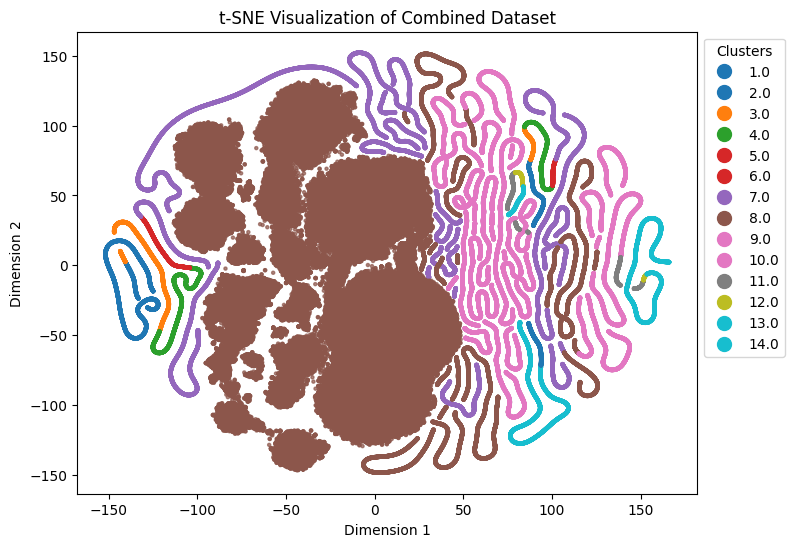

In [34]:
from openTSNE import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors

# Combine labeled and unlabeled data with predicted labels
def combine_dataset(x_labeled, y_labeled, x_unlabeled, y_unlab_pred):
    labeled_data = pd.DataFrame(x_labeled)
    labeled_data['label'] = y_labeled

    unlabeled_data = pd.DataFrame(x_unlabeled)
    unlabeled_data['label'] = y_unlab_pred

    combined_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)
    return combined_dataset

# Generate t-SNE visualization with distinct cluster colors
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    # Ensure labels are integers for discrete colormap
    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}

    # Map each label to a discrete color index
    discrete_colors = np.array([label_to_color[label] for label in labels])

    # Generate a discrete colormap
    cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=discrete_colors, cmap=cmap, s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10) for idx in range(len(unique_labels))]
    plt.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))
    plt.show()

# Combine the labeled and unlabeled data
combined_dataset = combine_dataset(
    x_labeled=x_labeled.to_numpy(),
    y_labeled=y_labeled.to_numpy(),
    x_unlabeled=x_unlabeled_scaled,
    y_unlab_pred=y_unlab_pred
)

# Extract features and labels for t-SNE
features = combined_dataset.drop(columns=['label']).to_numpy()
labels = combined_dataset['label'].to_numpy()

# Generate t-SNE plot with distinct cluster colors
plot_tsne_opentsne(features, labels, title="t-SNE Visualization of Combined Dataset")


In [35]:
pip install openTSNE

In [36]:
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
  x_unlab_encoded = encoder.predict(x_unlab)
  _, y_unlab_hat = predictor(x_unlab_encoded, training=False)
  y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
  return y_unlab_pred
'''
performance metric -> generate unlabeled predictions -> inout prediction labels for the unlabeled part of the dataset
generate tsne for this new dataset
'''

'\nperformance metric -> generate unlabeled predictions -> inout prediction labels for the unlabeled part of the dataset\ngenerate tsne for this new dataset\n'

In [37]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existi

In [39]:
import gradio as gr
import pandas as pd
import numpy as np
from openTSNE import TSNE
import matplotlib.pyplot as plt
from matplotlib import colormaps  # Import for the updated colormap handling
from tensorflow.keras.models import load_model

import io  # For creating image buffers





def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    """Generate t-SNE visualization with distinct cluster colors."""
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}
    discrete_colors = np.array([label_to_color[label] for label in labels])

    cmap = colormaps.get_cmap('tab10')  # Get the colormap
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(
        tsne_result[:, 0],
        tsne_result[:, 1],
        c=discrete_colors,
        cmap=cmap,
        s=5,
        alpha=0.7
    )
    ax.set_title(title)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [
        plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10)
        for idx in range(len(unique_labels))
    ]
    ax.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))

    return fig



# Define Gradio function
def process_and_visualize():
    """
    Process the `x_unlabeled` variable, predict labels, and visualize with t-SNE.
    """
    # Ensure x_unlabeled is preloaded
    global x_unlabeled

    # Select 100 rows from x_unlabeled
    x_unlabeled_subset = x_unlabeled[:500]

    # Ensure model and encoder are preloaded
    encoder = load_model(encoder_path)  # Load pre-trained encoder
    predictor = trained_model  # Assume predictor is already trained

    # Generate predictions
    predicted_labels = generate_unlabeled_predictions(x_unlabeled_subset, encoder, predictor)


    tsne_plot = plot_tsne_opentsne(x_unlabeled_subset, predicted_labels, title="t-SNE Visualization of Input Data")

    # Return the visualization and predictions
    return tsne_plot, pd.DataFrame({"Predicted Labels": predicted_labels}).head(10)

# Initialize Gradio Interface
outputs = [
    gr.Plot(label="t-SNE Visualization"),
    gr.Dataframe(label="Predicted Labels (Top 10)")
]

gr.Interface(
    fn=process_and_visualize,
    inputs=None,  # No user inputs required
    outputs=outputs,
    title="Self-Supervised Learning Visualizer",
    description="Automatically processes the `x_unlabeled` dataset for visualization and prediction."
).launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://7f898173f29b7f67f3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


16/16 [==============================] - 0s 1ms/step


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2019, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1566, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://b7c4d1794e475a68b2.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://7f898173f29b7f67f3.gradio.live


In [40]:
x_unlabeled.shape

(161443, 38)

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from openTSNE import TSNE
import matplotlib.pyplot as plt
from matplotlib import colormaps  # Import for the updated colormap handling
from tensorflow.keras.models import load_model

# Define function to generate predictions for unlabeled data
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """Generate predictions for unlabeled data."""
    x_unlab_encoded = encoder.predict(x_unlab)  # Encode unlabeled data
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)  # Predict with classifier
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)  # Get predicted class labels
    return y_unlab_pred

# Define the function for t-SNE visualization
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    """Generate t-SNE visualization with distinct cluster colors."""
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}
    discrete_colors = np.array([label_to_color[label] for label in labels])

    cmap = colormaps.get_cmap('tab10')  # Get the colormap
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(
        tsne_result[:, 0],
        tsne_result[:, 1],
        c=discrete_colors,
        cmap=cmap,
        s=5,
        alpha=0.7
    )
    ax.set_title(title)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [
        plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10)
        for idx in range(len(unique_labels))
    ]
    ax.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))

    return fig

# Define Gradio function to process and visualize
def process_and_visualize(start_row, end_row):
    """
    Process the `x_unlabeled` variable, predict labels, and visualize with t-SNE.
    Takes a range of rows as input from the user.
    """
    # Ensure x_unlabeled is preloaded
    global x_unlabeled

    # Convert input to integers
    start_row = int(start_row)
    end_row = int(end_row)

    # Select rows from x_unlabeled based on the provided range
    x_unlabeled_subset = x_unlabeled[start_row:end_row]

    # Ensure model and encoder are preloaded
    encoder = load_model(encoder_path)  # Load pre-trained encoder
    predictor = trained_model  # Assume predictor is already trained

    # Generate predictions
    predicted_labels = generate_unlabeled_predictions(x_unlabeled_subset, encoder, predictor)

    # Create t-SNE visualization
    tsne_plot = plot_tsne_opentsne(x_unlabeled_subset, predicted_labels, title="t-SNE Visualization of Input Data")

    # Return the visualization and predictions
    return tsne_plot, pd.DataFrame({"Predicted Labels": predicted_labels}).head(10)

# Initialize Gradio Interface
inputs = [
    gr.Number(label="Start Row", value=3, precision=0),  # Input for the starting row
    gr.Number(label="End Row", value=109, precision=0)   # Input for the ending row
]

outputs = [
    gr.Plot(label="t-SNE Visualization"),
    gr.Dataframe(label="Predicted Labels (Top 10)")
]

gr.Interface(
    fn=process_and_visualize,
    inputs=inputs,  # Use the range inputs
    outputs=outputs,
    title="Self-Supervised Learning Visualizer",
    description="Automatically processes the `x_unlabeled` dataset for visualization and prediction."
).launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://0006f93e7018ace60f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


4/4 [==============================] - 0s 2ms/step
